<a href="https://colab.research.google.com/github/martydom/icc-data-analysis/blob/main/Devashish_Bose_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. Plot the run worm graph of any one match.</b>

<br>




# <b><center> Sample Run Worm Graph </center></b>

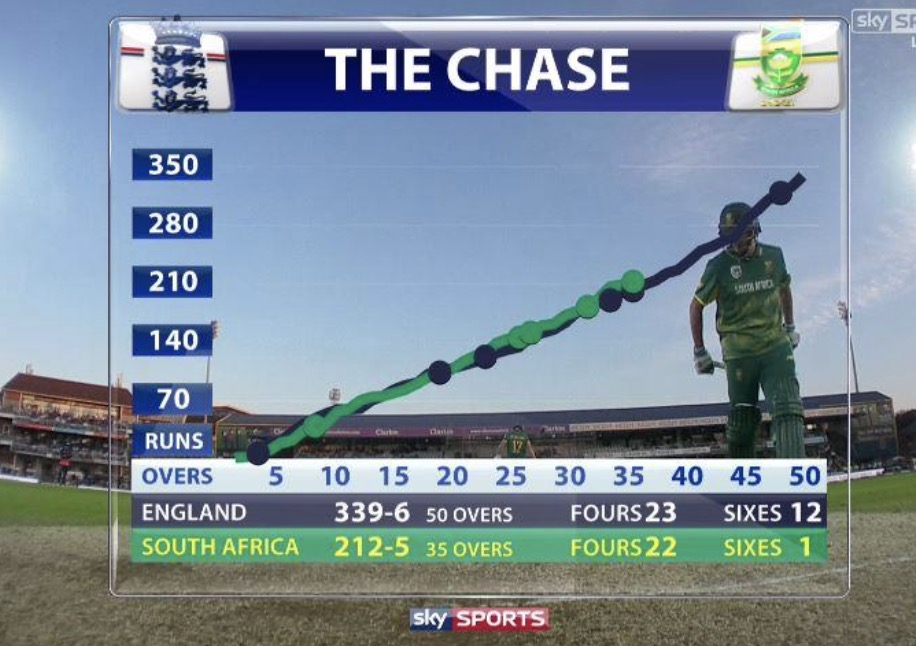

In [36]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
working_directory = '/content/drive/My Drive/AlmaBetter/Module 1/Week 4/Day 6/dat/'
df = pd.read_csv(working_directory + 'International_T20_Data.csv', parse_dates=['meta.created'])

In [39]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   innings                      1417 non-null   object        
 1   meta.data_version            1417 non-null   float64       
 2   meta.created                 1417 non-null   datetime64[ns]
 3   meta.revision                1417 non-null   int64         
 4   info.dates                   1417 non-null   object        
 5   info.gender                  1417 non-null   object        
 6   info.match_type              1417 non-null   object        
 7   info.outcome.by.wickets      651 non-null    float64       
 8   info.outcome.winner          1372 non-null   object        
 9   info.overs                   1417 non-null   int64         
 10  info.player_of_match         1255 non-null   object        
 11  info.teams                   1417 non-null 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


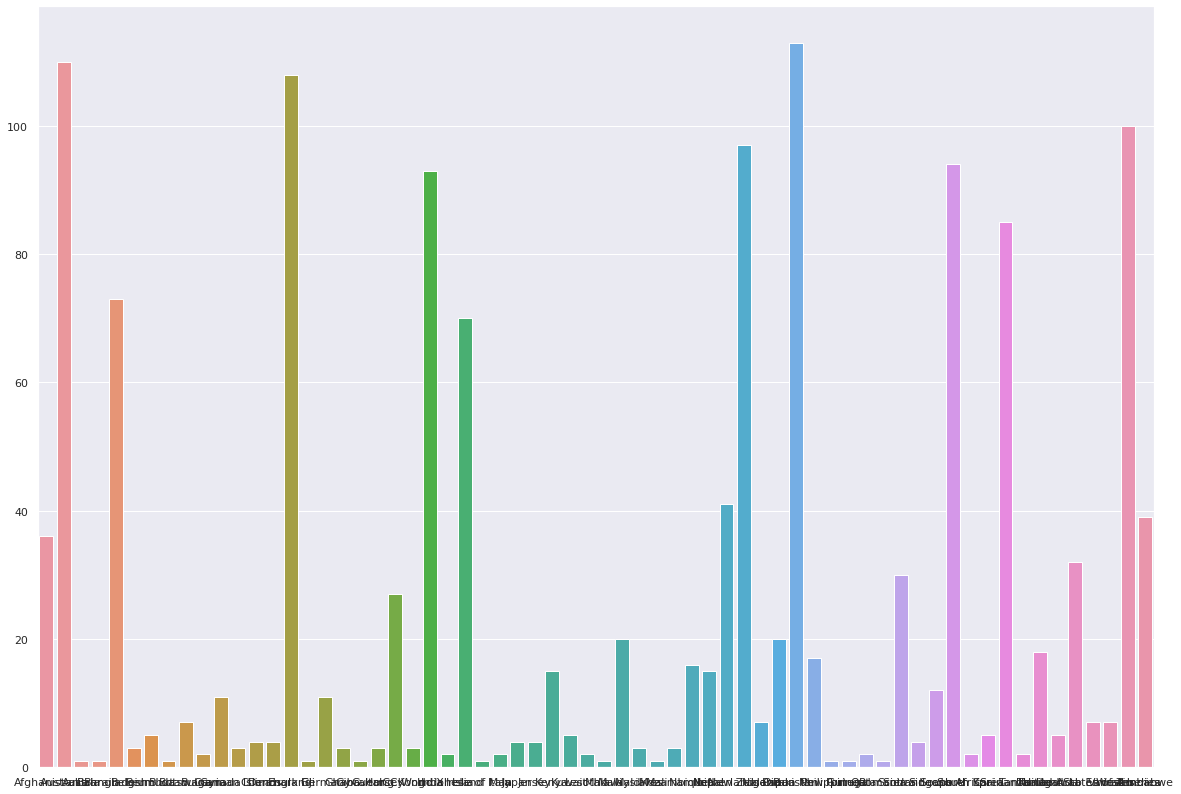

In [41]:
x,y = np.unique(df['info.toss.winner'],return_counts=True)
sns.barplot(x,y)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


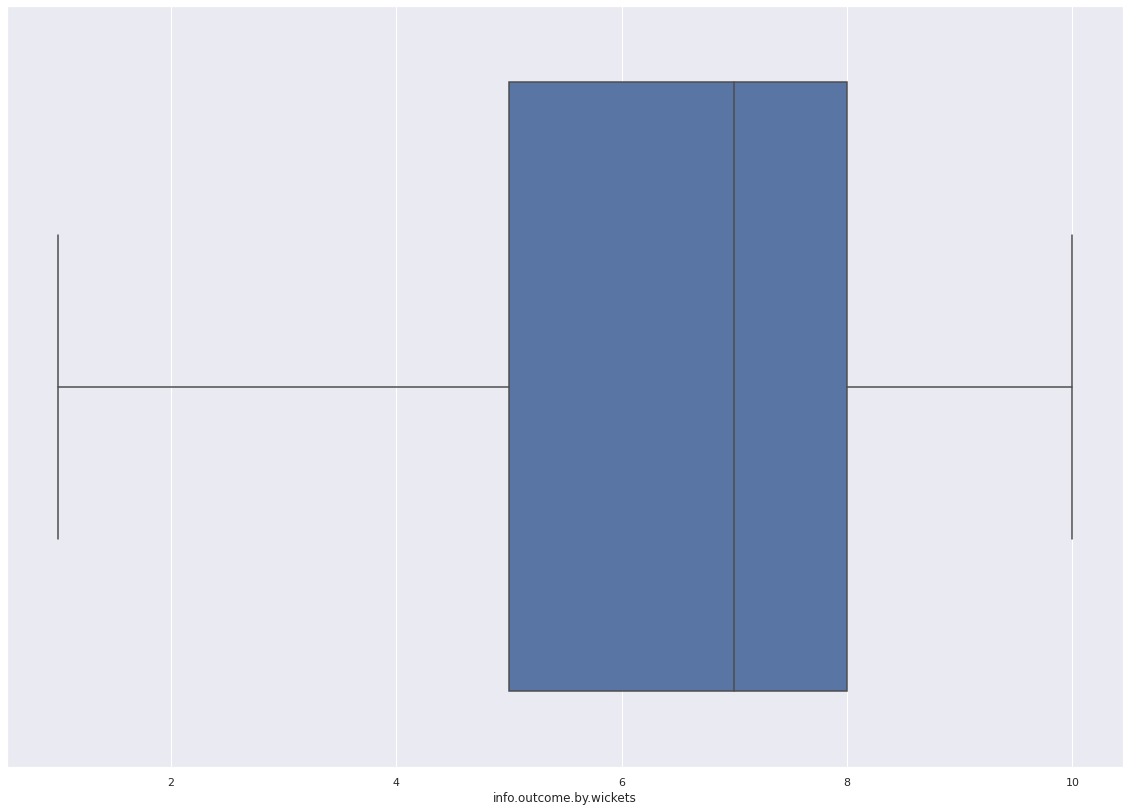

In [42]:
sns.boxplot(df['info.outcome.by.wickets'])

In [43]:
innings =  literal_eval(df.iloc[0,0])

In [44]:
len(innings)

2

In [45]:
first_inn_dict = innings[0]
sec_inn_dict = innings[1]

In [46]:
# sec_inn_dict.keys()

In [47]:
# first_inn_dict['1st innings']

In [48]:
# type(first_inn_dict['1st innings'])

In [49]:
# first_inn_dict['1st innings'].keys()

In [50]:
# first_inn_dict['1st innings']['team']

In [51]:
# first_inning_del = first_inn_dict['1st innings']['deliveries']

In [52]:
# first_inn_dict['1st innings']['deliveries'][0]

In [53]:
# first_inn_dict['1st innings']['deliveries'][1]

In [54]:
# first_inn_dict['1st innings']['deliveries'][124]

In [55]:
# total_runs = 0
# first_innings_deliveries_df = pd.DataFrame(columns = ['delivery_number','run_scored','over'])
# for delivery in first_inning_del:
#   delivery_number = list(delivery.keys())[0]
#   extras = delivery[delivery_number]['runs']['extras']
#   total = delivery[delivery_number]['runs']['total']
#   total_runs += total
#   first_innings_deliveries_df = first_innings_deliveries_df.append({'delivery_number':delivery_number, 'run_scored':total,'over':int(int(delivery_number)+1)}, ignore_index=True)
#   # print(delivery_number,extras,total)
#   # print(total_runs)

In [56]:
# first_innings_deliveries_df.head(6)

In [57]:
# first_innings_deliveries_df.groupby('over').agg({'run_scored':sum}).reset_index()

In [58]:
# first_innings_deliveries_df['total_score']= first_innings_deliveries_df['run_scored'].cumsum()

In [59]:
def get_inning_score(inning_del):
  # inning_del = inning_dict['1st innings']['deliveries']
  total_runs = 0
  innings_deliveries_df = pd.DataFrame(columns = ['delivery_number','run_scored','over'])
  for delivery in inning_del:
    delivery_number = list(delivery.keys())[0]
    extras = delivery[delivery_number]['runs']['extras']
    total = delivery[delivery_number]['runs']['total']
    total_runs += total
    if delivery[delivery_number].get('wicket'):
      wicket = 1
    else:
      wicket = 0
    innings_deliveries_df = innings_deliveries_df.append({'delivery_number':delivery_number, 'run_scored':total,'over':int(int(delivery_number)+1), 'wicket': wicket}, ignore_index=True)
    # print(delivery_number,extras,total)
    # print(total_runs)
  innings_deliveries_df.groupby('over').agg({'run_scored':sum}).reset_index()
  innings_deliveries_df['total_score']= innings_deliveries_df['run_scored'].cumsum()
  return innings_deliveries_df

In [60]:
f_in_df = get_inning_score(first_inn_dict['1st innings']['deliveries'])
f_in_df['innings'] = 'first'
f_in_df['team'] = first_inn_dict['1st innings']['team']

In [61]:
s_in_df = get_inning_score(sec_inn_dict['2nd innings']['deliveries'])
s_in_df['innings'] = 'second'
s_in_df['team'] = sec_inn_dict['2nd innings']['team']

In [62]:
match_score = pd.concat([f_in_df,s_in_df])

In [63]:
match_score.head()

,delivery_number,run_scored,over,wicket,total_score,innings,team
0,0.1,0.0,1.0,0.0,0.0,first,Australia
1,0.2,0.0,1.0,0.0,0.0,first,Australia
2,0.3,1.0,1.0,0.0,1.0,first,Australia
3,0.4,2.0,1.0,0.0,3.0,first,Australia
4,0.5,0.0,1.0,0.0,3.0,first,Australia


In [64]:
match_score.tail()

,delivery_number,run_scored,over,wicket,total_score,innings,team
120,19.2,1.0,20.0,0.0,164.0,second,Sri Lanka
121,19.3,1.0,20.0,0.0,165.0,second,Sri Lanka
122,19.4,1.0,20.0,0.0,166.0,second,Sri Lanka
123,19.5,2.0,20.0,0.0,168.0,second,Sri Lanka
124,19.6,4.0,20.0,0.0,172.0,second,Sri Lanka


Text(0.5, 1.0, 'Run Worm Graph')

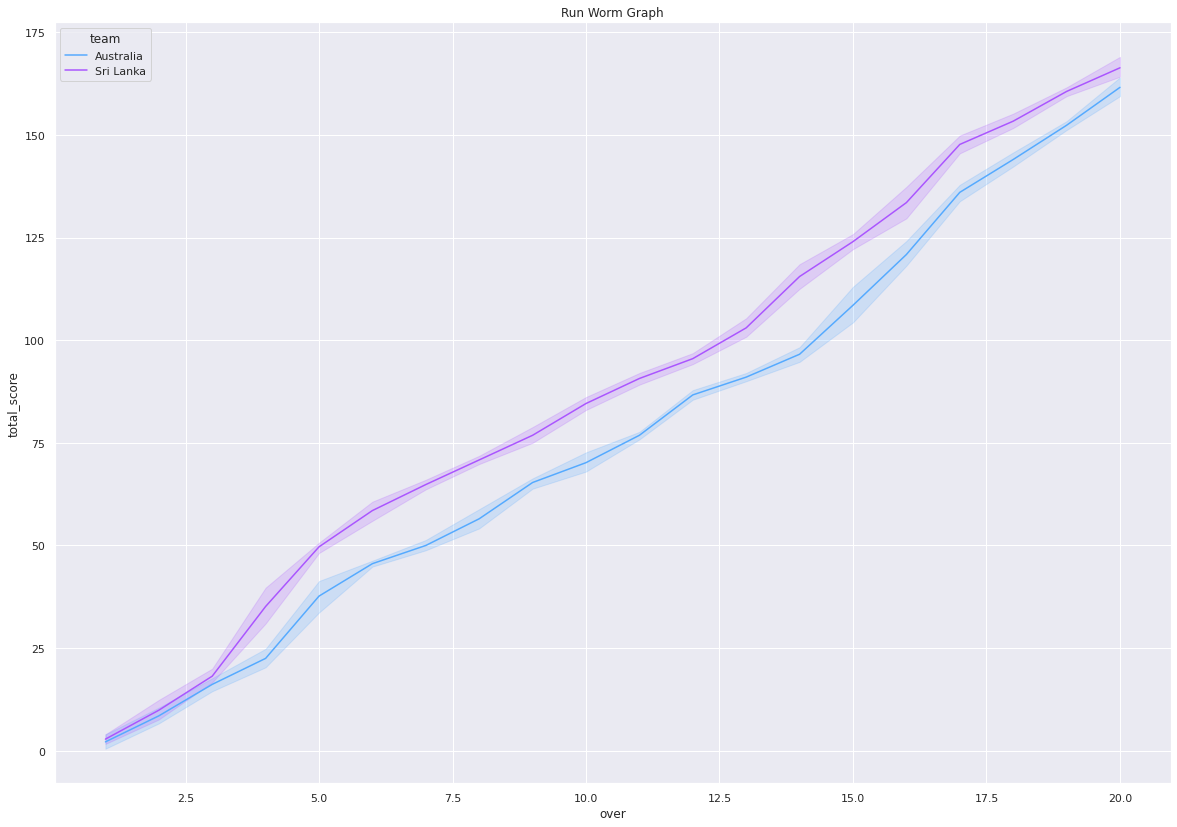

In [65]:
sns.lineplot(x='over',y = 'total_score',data=match_score,hue = 'team',style= 'team',palette='cool',dashes=False,legend='brief').set_title("Run Worm Graph")

In [66]:
# Second Commit

In [67]:
wicket_df = match_score[match_score['wicket']==1.0]

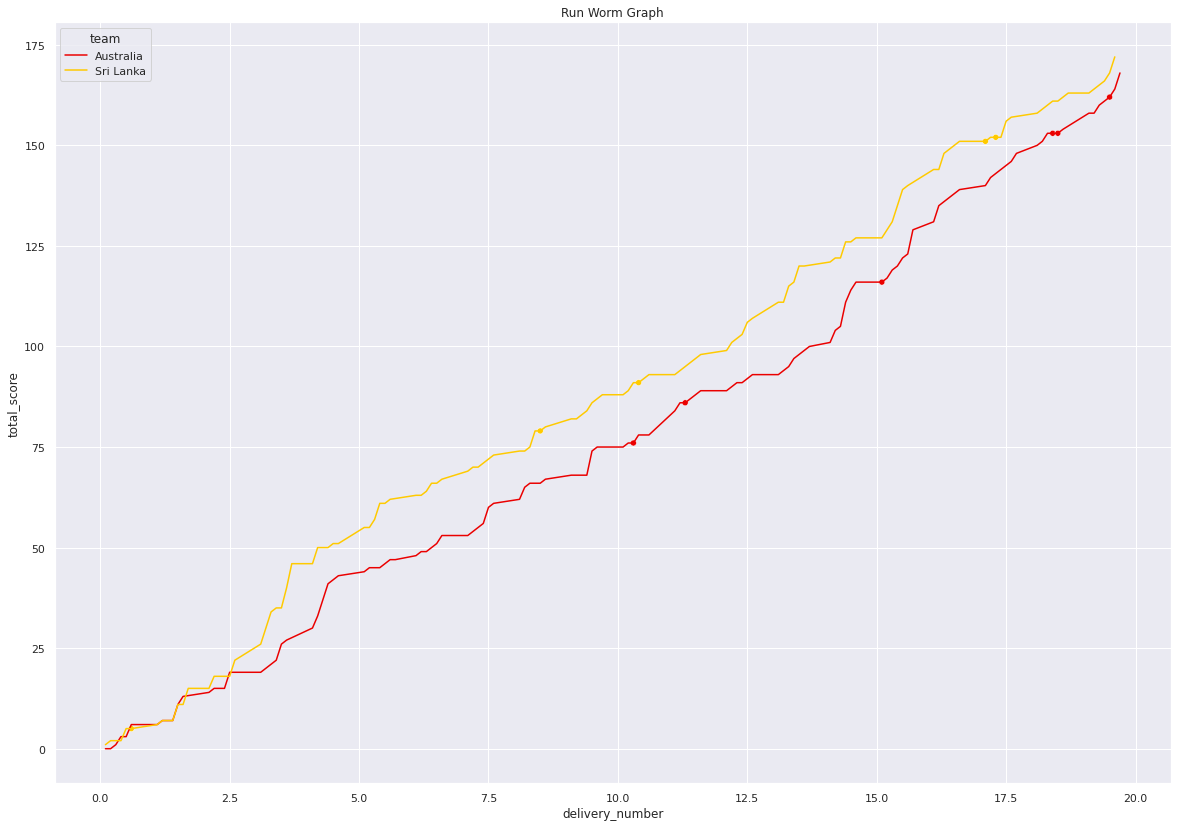

In [68]:
sns.lineplot(x='delivery_number',y = 'total_score',data=match_score,hue = 'team',style= 'team',palette='hot',dashes=False,legend='brief').set_title("Run Worm Graph")
sns.scatterplot(x='delivery_number',y = 'total_score',data=wicket_df,hue = 'team',style= 'team',palette='hot',markers = ['o','o'],legend = False)
sns.set(rc={'figure.figsize':(20,14)})